# 1 Intro

This notebook takes you through the process of refining/customizing a Matplotlib plot. We start from a line plot with Matplotlib's default style. We gradually improve the plot to make it "publication-ready". (See the figure below.)

This project and the final plot is inspired by these two news articles and the plots therein.

1. [These Seven Tech Stocks Are Driving the Market](https://www.nytimes.com/interactive/2024/01/22/business/magnificent-seven-stocks-tech.html) from the New York Times

2. [It’s the Magnificent Seven’s Market. The Other Stocks Are Just Living in It](https://www.wsj.com/finance/stocks/its-the-magnificent-sevens-market-the-other-stocks-are-just-living-in-it-5d212f95) from the Wall Street Journal.

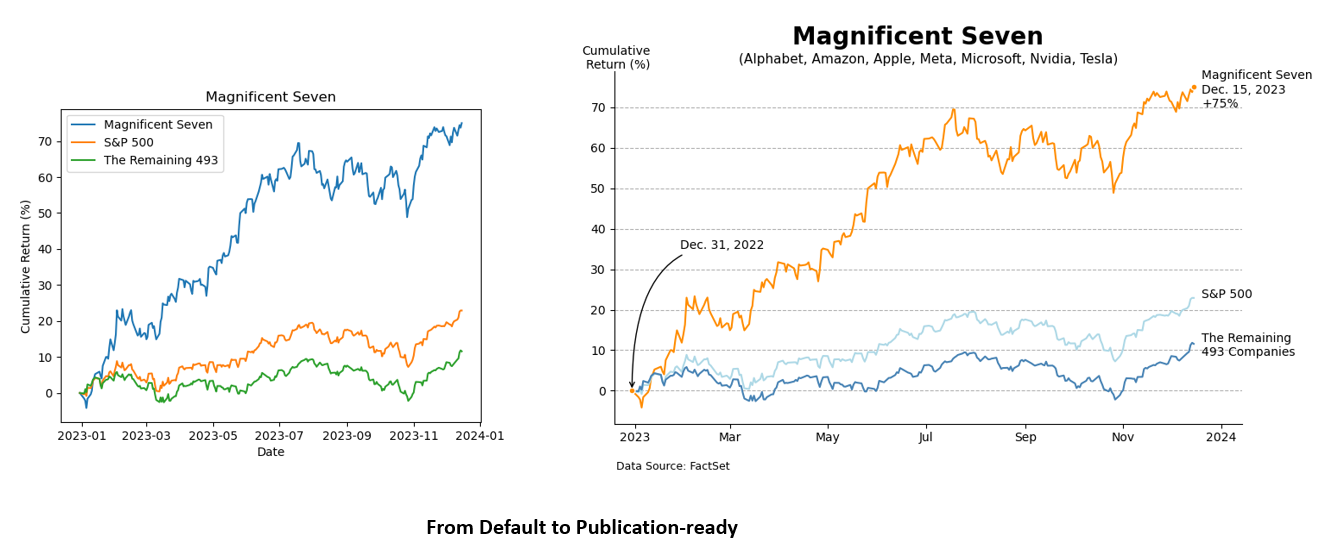

# 2 Data

We first load the magnificent seven dataset. The dataset contains cumulative returns for magnificent seven, S&P, and S&P excluding magnificent 7 from Dec. 30 2022 to Dec. 15 2023.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url_data = "https://github.com/tdmdal/datasets-teaching/raw/main/mag7/mag7.csv"
mag7_df = pd.read_csv(url_data, parse_dates=["date"])
mag7_df.head()

,mag7,sp,rest,date
0,0.00,0.00,0.00,2022-12-30
1,-1.57,-0.40,-0.12,2023-01-03
2,-2.17,0.35,1.06,2023-01-04
3,-4.17,-0.82,0.22,2023-01-05
4,-1.60,1.45,2.40,2023-01-06


# 3 From default to publication-ready

## 3.1 Round 1

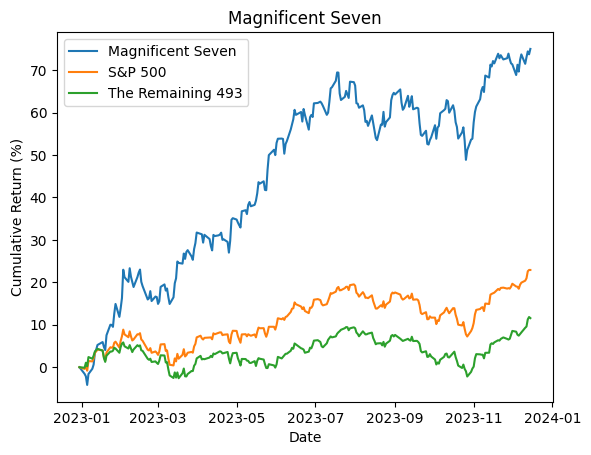

In [6]:
# Round 1

fig, ax = plt.subplots()

ax.plot(mag7_df["date"], mag7_df["mag7"])
ax.plot(mag7_df["date"], mag7_df["sp"])
ax.plot(mag7_df["date"], mag7_df["rest"])

ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Magnificent Seven")
ax.legend(["Magnificent Seven", "S&P 500", "The Remaining 493"])

plt.show()

## 3.2 Round 2

/tmp/ipython-input-2261179635.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


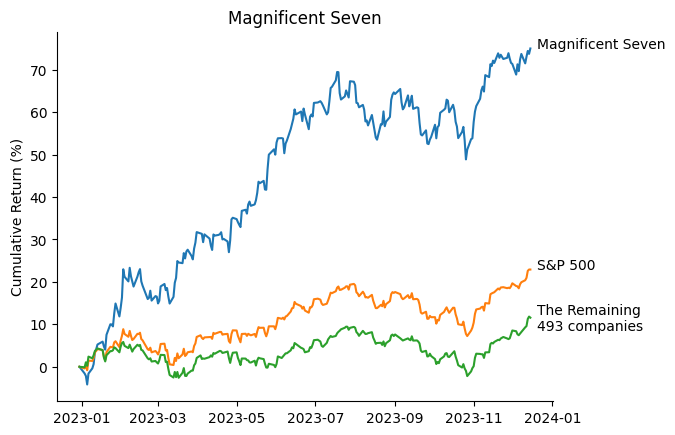

In [31]:
# Round 2
fig, ax = plt.subplots()

ax.plot(mag7_df["date"], mag7_df["mag7"])
ax.plot(mag7_df["date"], mag7_df["sp"])
ax.plot(mag7_df["date"], mag7_df["rest"])

# add annotation
labels = ["Magnificent Seven", "S&P 500", "The Remaining 493"]
ax.annotate(
    text = "Magnificent Seven",
    xy = (mag7_df["date"].iloc[-1], mag7_df["mag7"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),          # Where is annotation itself
              mag7_df["mag7"].iloc[-1],
          )
)

ax.annotate(
    text = "S&P 500",
    xy = (mag7_df["date"].iloc[-1], mag7_df["sp"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["sp"].iloc[-1],
          )
)

ax.annotate(
    text = "The Remaining\n493 companies",
    xy = (mag7_df["date"].iloc[-1], mag7_df["rest"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["rest"].iloc[-1]-3,
          )
)


# remove x-axis label
ax.set_xlabel("")

# remove legend
ax.legend().set_visible(False)

# hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Magnificent Seven")

plt.show()

## 3.3 Round 3

/tmp/ipython-input-1399277313.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


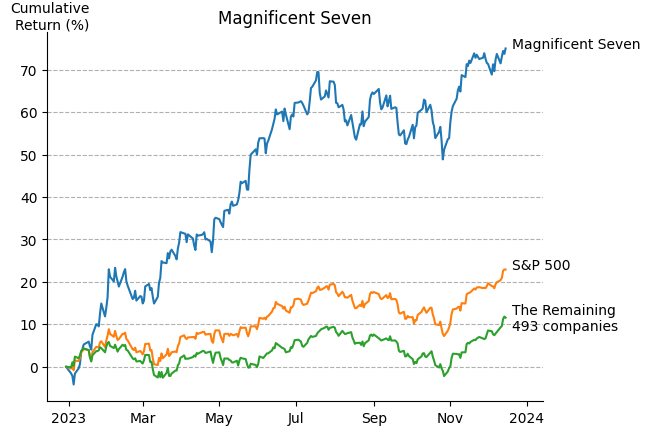

In [42]:
# Round 3
import matplotlib.dates as mdates

fig, ax = plt.subplots()

ax.plot(mag7_df["date"], mag7_df["mag7"])
ax.plot(mag7_df["date"], mag7_df["sp"])
ax.plot(mag7_df["date"], mag7_df["rest"])

# set x-axis view limits
ax.set_xlim(mag7_df["date"].iloc[0] - pd.Timedelta("15 days"),
      mag7_df["date"].iloc[-1] + pd.Timedelta("30 days"))

# set x-axis tick labels
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# set y-axis labels
ax.set_ylabel("Cumulative\nReturn (%)", loc="top", rotation=0, labelpad=-50)

# add annotation
labels = ["Magnificent Seven", "S&P 500", "The Remaining 493"]
ax.annotate(
    text = "Magnificent Seven",
    xy = (mag7_df["date"].iloc[-1], mag7_df["mag7"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),          # Where is annotation itself
              mag7_df["mag7"].iloc[-1],
          )
)

ax.annotate(
    text = "S&P 500",
    xy = (mag7_df["date"].iloc[-1], mag7_df["sp"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["sp"].iloc[-1],
          )
)

ax.annotate(
    text = "The Remaining\n493 companies",
    xy = (mag7_df["date"].iloc[-1], mag7_df["rest"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["rest"].iloc[-1]-3,
          )
)


# remove x-axis label
ax.set_xlabel("")

# remove legend
ax.legend().set_visible(False)

# hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add y grid
ax.grid(axis="y", linestyle="--")

ax.set_title("Magnificent Seven")

plt.show()

## 3.4 Round 4

/tmp/ipython-input-3117703095.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


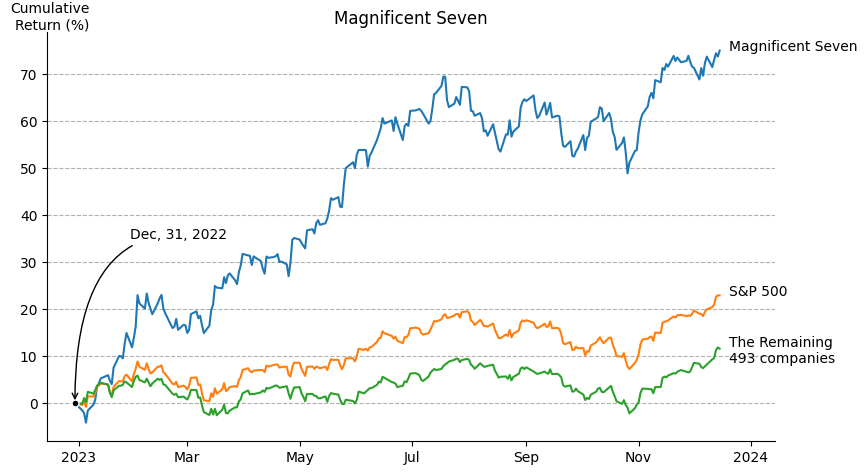

In [51]:
# Round 4
import matplotlib.dates as mdates

fig, ax = plt.subplots()

ax.plot(mag7_df["date"], mag7_df["mag7"])
ax.plot(mag7_df["date"], mag7_df["sp"])
ax.plot(mag7_df["date"], mag7_df["rest"])

# set ax aspect ratio and figure size
aspect_ratio = 9/16
ax.set_box_aspect(aspect_ratio)

scale = 1.05
fig_width = 9 * scale
fig_height = fig_width * aspect_ratio
fig.set_size_inches(fig_width, fig_height)

# set x-axis view limits
ax.set_xlim(mag7_df["date"].iloc[0] - pd.Timedelta("15 days"),
      mag7_df["date"].iloc[-1] + pd.Timedelta("30 days"))

# set x-axis tick labels
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# set y-axis labels
ax.set_ylabel("Cumulative\nReturn (%)", loc="top", rotation=0, labelpad=-50)

# add annotation
labels = ["Magnificent Seven", "S&P 500", "The Remaining 493"]
ax.annotate(
    text = "Magnificent Seven",
    xy = (mag7_df["date"].iloc[-1], mag7_df["mag7"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),          # Where is annotation itself
              mag7_df["mag7"].iloc[-1],
          )
)

ax.annotate(
    text = "S&P 500",
    xy = (mag7_df["date"].iloc[-1], mag7_df["sp"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["sp"].iloc[-1],
          )
)

ax.annotate(
    text = "The Remaining\n493 companies",
    xy = (mag7_df["date"].iloc[-1], mag7_df["rest"].iloc[-1]),
    xytext = (mag7_df["date"].iloc[-1] + pd.Timedelta("5 days"),
              mag7_df["rest"].iloc[-1]-3,
          )
)

# plot the first datapoint as a dot and annotate
ax.plot(mag7_df["date"].iloc[0], mag7_df["mag7"].iloc[0], marker="o", markersize=5, markeredgecolor="white", color="black")
ax.annotate(
    text = "Dec, 31, 2022",
    xy = (mag7_df["date"].iloc[0], mag7_df["mag7"].iloc[0]),
    xytext=(mag7_df["date"].iloc[0] + pd.Timedelta("30 days"),
           mag7_df["mag7"].iloc[0]+35,
          ),
    arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=90")
)

# remove x-axis label
ax.set_xlabel("")

# remove legend
ax.legend().set_visible(False)

# hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add y grid
ax.grid(axis="y", linestyle="--")

ax.set_title("Magnificent Seven")





# add the last data point of the magnificent seven as a dot and annotate it
# improve title
# add caption
# add the figure size
# remove tight_layout()




plt.show()

## 3.5 Round 5

In [ ]:
# Round 5
# adjust colors and fonts

